In [31]:
""" Carga de datasets Spotify Worldwide Analisys """
#nota cargar funciones de spotify, doc & define
import pandas as pd
import numpy as np
import spotify
import matplotlib.pyplot as plt

In [2]:
# Siendo data.csv el dataset inicial
daily_song_df = pd.read_csv("data/data.csv")
print(daily_song_df.head(10))

   Position                  Track Name           Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)             CNCO    19272   
1         2                    Chantaje          Shakira    19270   
2         3   Otra Vez (feat. J Balvin)    Zion & Lennox    15761   
3         4                Vente Pa' Ca     Ricky Martin    14954   
4         5                      Safari         J Balvin    14269   
5         6                La Bicicleta     Carlos Vives    12843   
6         7                  Ay Mi Dios         IAmChino    10986   
7         8          Andas En Mi Cabeza    Chino & Nacho    10653   
8         9                 Traicionera  Sebastian Yatra     9807   
9        10                 Shaky Shaky     Daddy Yankee     9612   

                                                 URL        Date Region  
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec  
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01     ec  
2  https://open.sp

In [3]:
# labels
columnas = ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region']
#regiones

regiones_id = {'id': 'Indonesia', 'ca': 'Canada', 'sg': 'Singapore', 'pt': 'Portugal',
                'au': 'Australia', 'hn': 'Honduras', 'dk': 'Denmark', 'pl': 'Poland', 
                'it': 'Italy', 'hk': 'Hong Kong', 'ie': 'Irelad', 'lt': 'Lithuania', 
                'gt': 'Guatemala', 'se': 'Senegal', 'lu': 'Luxemburg', 'fr': 'France', 
                'ar': 'Argentina', 'ec': 'Ecuador', 'uy': 'Uruguay', 'tw': 'Taiwan', 
                'gr': 'Greece', 'do': 'Dominic Republic', 'fi': 'Finland', 'co': 'Colombia', 
                'global': 'Global', 'lv': 'Latvia', 'cz': 'Czech Republic', 'at': 'Austria', 
                'bo': 'Bolivia', 'gb': 'United Kingdom', 'jp': 'Japon', 'be': 'Belgium', 
                'es': 'Spain', 'ee': 'Estonia', 'no': 'Norway', 'nz': 'New Zeland', 
                'tr': 'Turkey', 'br': 'Brazil', 'is': 'Iceland', 'pe': 'Peru', 
                'cr': 'Costa Rica', 'mx': 'Mexico', 'ch': 'Switzerland', 
                'pa': 'Panama', 'nl': 'Netherlands', 'hu': 'Hungary', 'ph': 'Philippines',
                'sk': 'Slovakia', 'sv': 'El Salvador', 'cl': 'Chile', 'us': 'United States',
                'my': 'Malaysia', 'de': 'Germany', 'py': 'Paraguay'}

print("Cantidad total de regiones en dataset: {}".format(len(regiones_id.keys())))
# Para conveniencia de manejo de nombres paises usamos este diccionario inverso
regiones_name = {v : k for k,v in regiones_id.items()}

Cantidad total de regiones en dataset: 54


In [4]:
""" Guardando datos """
# si memoria es true cargara los datos previamente calculados, si false volvera a calcular todo
MEMORIA = True

import pickle

def save_p(object, filename, path="data/"):
    
    file_object = open(path+filename, 'wb')
    pickle.dump(object, file_object)  #PICKLE
    file_object.close()
    
def load_p(filename, path="data/"):
    file_object = open(path+filename,'rb')
    objeto = pickle.load(file_object)       #PICKLE
    return objeto

print("Cargando funciones de pickle")

Cargando funciones de pickle


# LIMPIANDO 

In [5]:
print ('Contabilidad de valores nulos por columna')
print (daily_song_df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en la columna *Track Name*')
track_null_porcentaje = daily_song_df['Track Name'].isnull().sum() / daily_song_df.shape[0] * 100
print (track_null_porcentaje)

print ('Porcentaje de datos nulos en la columna *Artist*')
artist_null_porcentaje = daily_song_df['Artist'].isnull().sum() / daily_song_df.shape[0] * 100
print (artist_null_porcentaje)

Contabilidad de valores nulos por columna
Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64 

Porcentaje de datos nulos en la columna *Track Name*
0.019092193791869515
Porcentaje de datos nulos en la columna *Artist*
0.019092193791869515


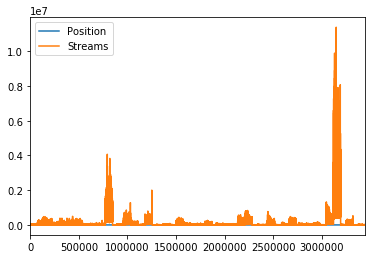

In [40]:
daily_song_df.plot()
plt.show()

Estos son los datos nulos mas no encuentra los dias que faltan.

Cada region tendra un conjunto de fechas



In [6]:
fechas_por_region = {}
for id_region, name_region in regiones_id.items():
    df_region = spotify.get_region(daily_song_df, id_region)
    fechas_por_region[id_region] = spotify.get_dates(df_region) 
    print("Cantidad de fechas en la region {}: {}".format(name_region, len(fechas_por_region[id_region]) ) )

print("Cantidad de regiones: {}\t".format(len(fechas_por_region)))

Cantidad de fechas en la region Indonesia: 371
Cantidad de fechas en la region Canada: 371
Cantidad de fechas en la region Singapore: 371
Cantidad de fechas en la region Portugal: 371
Cantidad de fechas en la region Australia: 371
Cantidad de fechas en la region Honduras: 371
Cantidad de fechas en la region Denmark: 371
Cantidad de fechas en la region Poland: 371
Cantidad de fechas en la region Italy: 371
Cantidad de fechas en la region Hong Kong: 371
Cantidad de fechas en la region Irelad: 371
Cantidad de fechas en la region Lithuania: 302
Cantidad de fechas en la region Guatemala: 371
Cantidad de fechas en la region Senegal: 371
Cantidad de fechas en la region Luxemburg: 217
Cantidad de fechas en la region France: 371
Cantidad de fechas en la region Argentina: 371
Cantidad de fechas en la region Ecuador: 371
Cantidad de fechas en la region Uruguay: 371
Cantidad de fechas en la region Taiwan: 371
Cantidad de fechas en la region Greece: 371
Cantidad de fechas en la region Dominic Repub

In [7]:
regiones_incompletas = [(name_region, len(fechas_por_region[id_region])) for id_region, name_region in regiones_id.items()
                        if len(fechas_por_region[id_region]) < 371]

print("Cantidad de regiones incompletas: {}".format(len(regiones_incompletas)))
print("Regiones que no tienen todas las fechas: {}".format(regiones_incompletas))



Cantidad de regiones incompletas: 7
Regiones que no tienen todas las fechas: [('Lithuania', 302), ('Luxemburg', 217), ('Global', 369), ('Latvia', 348), ('Estonia', 265), ('Slovakia', 367), ('Malaysia', 370)]


Tenemos 7 regiones que tienen los dias incompletos y la que menos tiene es Luxemburg con 217 dias. Regiones como Malaysia, Slovakia, y Global solo faltan unos cuantos dias. Todas seran ignoradas en los analisis, veremos que hacemos con ellas al final.

In [8]:
regiones_completas = [(id_,name) for id_,name in regiones_id.items() if len(fechas_por_region[id_]) == 371]
print("Cantidad de regiones completas: {}".format(len(regiones_completas)))
print("Regiones que vamos a analizar: {}".format(regiones_completas))


Cantidad de regiones completas: 47
Regiones que vamos a analizar: [('id', 'Indonesia'), ('ca', 'Canada'), ('sg', 'Singapore'), ('pt', 'Portugal'), ('au', 'Australia'), ('hn', 'Honduras'), ('dk', 'Denmark'), ('pl', 'Poland'), ('it', 'Italy'), ('hk', 'Hong Kong'), ('ie', 'Irelad'), ('gt', 'Guatemala'), ('se', 'Senegal'), ('fr', 'France'), ('ar', 'Argentina'), ('ec', 'Ecuador'), ('uy', 'Uruguay'), ('tw', 'Taiwan'), ('gr', 'Greece'), ('do', 'Dominic Republic'), ('fi', 'Finland'), ('co', 'Colombia'), ('cz', 'Czech Republic'), ('at', 'Austria'), ('bo', 'Bolivia'), ('gb', 'United Kingdom'), ('jp', 'Japon'), ('be', 'Belgium'), ('es', 'Spain'), ('no', 'Norway'), ('nz', 'New Zeland'), ('tr', 'Turkey'), ('br', 'Brazil'), ('is', 'Iceland'), ('pe', 'Peru'), ('cr', 'Costa Rica'), ('mx', 'Mexico'), ('ch', 'Switzerland'), ('pa', 'Panama'), ('nl', 'Netherlands'), ('hu', 'Hungary'), ('ph', 'Philippines'), ('sv', 'El Salvador'), ('cl', 'Chile'), ('us', 'United States'), ('de', 'Germany'), ('py', 'Paragua

In [9]:
""" Consiguiendo un dataframe de la region Mexico para analisis inicial """

data = spotify.get_region(daily_song_df, 'mx')


In [26]:
""" Consiguiendo informacion de una sola region """


artistas = {} #('Artista', frec, max_position,  )

#for region_id, region_name in regiones_completas:
region_id = 'mx'
region_name = 'Mexico'

#data = spotify.get_region(daily_song_df, region_id)
list_artist = data['Artist'].values
conteo_artistas = data['Artist'].value_counts()
# fechas_por_region[region_id]
print("tipo de list_artist: {}".format(type(list_artist)))
print("tipo de conteo_artistas: {}".format(type(conteo_artistas)))

print("Cantidad de artists en list_artist {}: {}".format(region_name, len(list_artist)))
print("Lista de artistas: {}".format(list_artist))

print("Cantidad de artistas en conteo_artistas: {}".format(conteo_artistas.shape))
print("Conteo de artistas: \n{}".format(conteo_artistas.head(5)))





tipo de list_artist: <class 'numpy.ndarray'>
tipo de conteo_artistas: <class 'pandas.core.series.Series'>
Cantidad de artists en list_artist Mexico: 74200
Lista de artistas: ['Shakira' 'CNCO' 'Ricky Martin' ... 'The Weeknd' 'Twenty One Pilots'
 'Portugal. The Man']
Cantidad de artistas en conteo_artistas: (389,)
Conteo de artistas: 
Ed Sheeran                                 1929
Maluma                                     1796
J Balvin                                   1783
Ozuna                                      1777
Banda Sinaloense MS de Sergio Lizárraga    1597
Nicky Jam                                  1277
Cartel De Santa                            1218
The Chainsmokers                           1184
Alejandro Fernandez                        1171
Mon Laferte                                1129
Bad Bunny                                   961
Sebastian Yatra                             923
Reik                                        825
Calvin Harris                            

Tenemos 389 artistas diferentes para la region de mexico, siendo Ed Sheeran el que tiene mas canciones entre los top 200 de la region. De las 74200 canciones que entraron al 200 durante las fechas que tenemos, 1929 son de Edsheeran

In [49]:
print(type(conteo_artistas))
print(conteo_artistas.describe())
""" Tenemos que en promedio los artistas aparacen 190 veces en el dataframe"""

<class 'pandas.core.series.Series'>
count     389.000000
mean      190.704370
std       303.813066
min         1.000000
25%         4.000000
50%        62.000000
75%       255.000000
max      1929.000000
Name: Artist, dtype: float64


' Tenemos que en promedio los artistas aparacen 190 veces en el dataframe'

In [50]:
""" cantidad de streams """
print(conteo_artistas)

Ed Sheeran                                 1929
Maluma                                     1796
J Balvin                                   1783
Ozuna                                      1777
Banda Sinaloense MS de Sergio Lizárraga    1597
Nicky Jam                                  1277
Cartel De Santa                            1218
The Chainsmokers                           1184
Alejandro Fernandez                        1171
Mon Laferte                                1129
Bad Bunny                                   961
Sebastian Yatra                             923
Reik                                        825
Calvin Harris                               819
Farruko                                     814
Twenty One Pilots                           811
CNCO                                        804
Wisin                                       802
The Weeknd                                  789
Shakira                                     786
Daddy Yankee                            

### Canciones
Ahora vamos a ver que pasa con las canciones


In [ ]:
id_region = 'mx'
name_region = 'Mexico'

